k-means法の様子を可視化する

In [20]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

### 1. 学習を行うデータを生成


In [ ]:
X, y = make_blobs(n_samples=500, centers=3, cluster_std=3, random_state=10)
print("学習データ: ", X.shape)  # (500, 2)
print("正解データ: ", y.shape)  # (500,)

学習データ:  (500, 2)
正解データ:  (500,)


### 2. k-means法のアルゴリズムを実装

In [ ]:
# k-means法のパラメータ
K = 3  # クラスタ数
max_iters = 100  # 最大イテレーション数
tol = 1e-4  # 収束判定の閾値

In [16]:
np.random.seed(42)  # 再現性のためのシード設定
centroids = X[np.random.choice(X.shape[0], K, replace=False)]
print("初期重心:\n", centroids)

labels_list = []
centroids_list = []

初期重心:
 [[-1.025343   -1.18197488]
 [ 1.37862886 -3.17710442]
 [ 6.22462336 -2.43005902]]


In [17]:
for i in range(max_iters):
    # 各データポイントと重心までの距離を計算
    distnces = np.linalg.norm(X[:, np.newaxis] - centroids[np.newaxis, :], axis=2)
    # 最も近い重心を見つける
    labels = np.argmin(distnces, axis=1)
    # 新しい重心を計算
    new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
    # 重心の変化が小さい場合は終了
    if np.linalg.norm(new_centroids - centroids) < tol:
        break
    centroids = new_centroids
    # 履歴を保存
    labels_list.append(labels)
    centroids_list.append(centroids)

print("最終重心:\n", centroids)

最終重心:
 [[ 2.53766047  5.06919103]
 [-0.76631652 -5.78495872]
 [ 5.94059014 -9.51786042]]


### animationの作成/保存

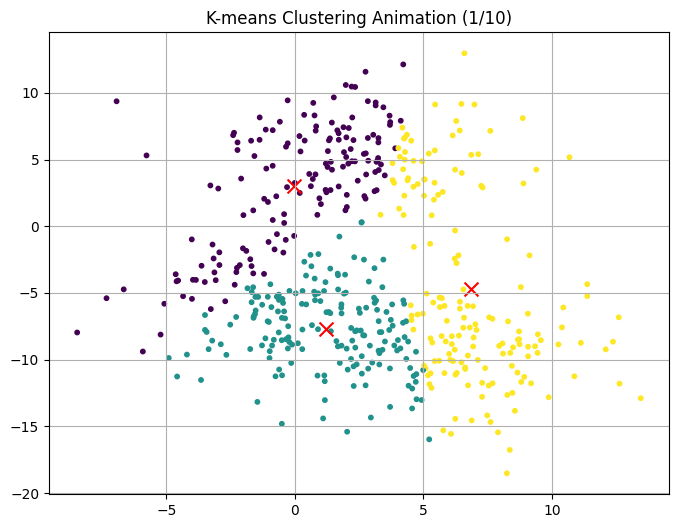

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

# 初期状態の設定
clf_plot = ax.scatter(X[:, 0], X[:, 1], c=labels_list[0], cmap='viridis', s=10)
cent_plot = ax.scatter(centroids_list[0][:, 0], centroids_list[0][:, 1], c='red', marker='x', s=100)
ax.set_title(f'K-means Clustering Animation ({1}/{len(labels_list)})')
ax.grid(True)

def update(frame):
    ax.clear()
    ax.scatter(X[:, 0], X[:, 1], c=labels_list[frame], cmap='viridis', s=10)
    ax.scatter(centroids_list[frame][:, 0], centroids_list[frame][:, 1], c='red', marker='x', s=100)
    ax.set_title(f'K-means Clustering Animation ({frame+1}/{len(labels_list)})')
    ax.grid(True)
ani = FuncAnimation(fig, update, frames=len(labels_list), repeat=True)
# 動画の保存
ani.save('./img/kmeans_clustering.gif', writer=PillowWriter(fps=2))